In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
raw_df = pd.read_csv('/content/drive/MyDrive/VenkyDataset/figure-1.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Activity standard occupational classification  4880 non-null   object
 1   Mode of employment                             4880 non-null   object
 2   Sex                                            4880 non-null   object
 3   Contract marker                                4880 non-null   object
 4   Nationality                                    4880 non-null   object
 5   Academic Year                                  4880 non-null   object
 6   Number                                         4880 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 267.0+ KB


In [ ]:
raw_df.describe(include="all")

,Activity standard occupational classification,Mode of employment,Sex,Contract marker,Nationality,Academic Year,Number
count,4880,4880,4880,4880,4880,4880,4880.000000
unique,12,3,4,3,5,5,NaN
top,Professional occupations,All,All,Non-academic,All,2016/17,NaN
freq,870,1720,1375,2755,1075,976,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,8070.140369
std,NaN,NaN,NaN,NaN,NaN,NaN,23422.990160
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,147.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3371.250000


In [ ]:
categorical_data = {}
for col in raw_df.select_dtypes(include=['object']).columns:
    categorical_data[col] = raw_df[col].unique()
categorical_data

{'Activity standard occupational classification': array(['Managers, directors and senior officials',
        'Professional occupations',
        'Associate professional and technical occupations',
        'Clerical and manual occupations', 'Total academic staff',
        'Administrative and secretarial occupations',
        'Skilled trades occupations',
        'Caring, leisure and other service occupations',
        'Sales and customer service occupations',
        'Process, plant and machine operatives', 'Elementary occupations',
        'Total non-academic staff'], dtype=object),
 'Mode of employment': array(['Full-time', 'Part-time', 'All'], dtype=object),
 'Sex': array(['Female', 'Male', 'Other', 'All'], dtype=object),
 'Contract marker': array(['Academic (excluding atypical)', 'Academic atypical',
        'Non-academic'], dtype=object),
 'Nationality': array(['European Union', 'Non-European Union', 'Not known', 'UK', 'All'],
       dtype=object),
 'Academic Year': array(['2016/17

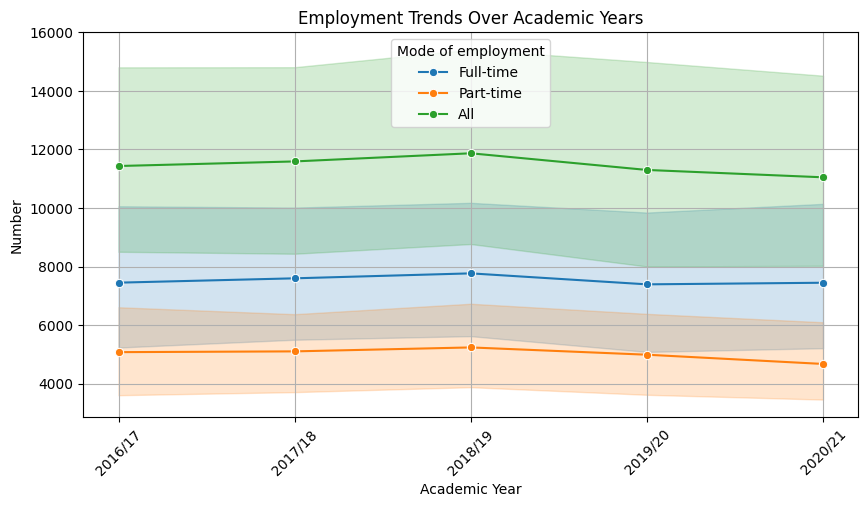

In [ ]:
# Distribution of employment numbers over academic years
plt.figure(figsize=(10, 5))
sns.lineplot(data=raw_df, x="Academic Year", y="Number", hue="Mode of employment", marker="o")
plt.title("Employment Trends Over Academic Years")
plt.xticks(rotation=45)
plt.grid()
plt.show()

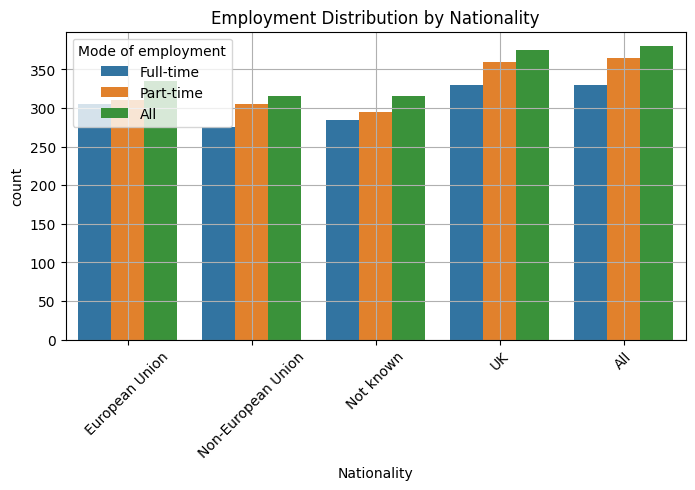

In [ ]:
# Distribution of nationalities in dataset
plt.figure(figsize=(8, 4))
sns.countplot(data=raw_df, x="Nationality", hue="Mode of employment")
plt.title("Employment Distribution by Nationality")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
!pip install transformers
!pip install datasets
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

print("Model and Tokenizer loaded successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Model and Tokenizer loaded successfully!


In [ ]:
# Provide an input example
input_text = "translate English to SQL: Show me all employees in the IT department"

# Tokenize the input text
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Generate output using the model
outputs = model.generate(input_ids)

# Decode and print the result
print("Predicted SQL Query:")
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Predicted SQL Query:
SQL zeigen mir alle Mitarbeiter in der IT-Abteilung


In [ ]:
# Define small training data: (input, output) pairs
train_data = [
    ("translate English to SQL: Show me all employees", "SELECT * FROM employees;"),
    ("translate English to SQL: List all departments", "SELECT * FROM departments;"),
    ("translate English to SQL: Find employees in HR", "SELECT * FROM employees WHERE department = 'HR';"),
    ("translate English to SQL: Show salaries above 50000", "SELECT * FROM employees WHERE salary > 50000;"),
    ("translate English to SQL: Get all job titles", "SELECT DISTINCT job_title FROM employees;"),
]

# Split inputs and outputs
inputs = [x[0] for x in train_data]
outputs = [x[1] for x in train_data]

print("Sample inputs and outputs created!")


Sample inputs and outputs created!


In [ ]:
import torch

# Tokenize inputs and outputs
input_encodings = tokenizer(inputs, padding=True, truncation=True, return_tensors="pt")
output_encodings = tokenizer(outputs, padding=True, truncation=True, return_tensors="pt")

# Move data to the same device as the model (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Prepare the input and label tensors
input_ids = input_encodings.input_ids.to(device)
attention_mask = input_encodings.attention_mask.to(device)
labels = output_encodings.input_ids.to(device)

print(f"Data tokenized and moved to {device}!")


Data tokenized and moved to cuda!


In [ ]:
from torch.optim import AdamW

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Fine-tuning loop
model.train()
epochs = 5  # Small number of epochs for quick tuning

for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    outputs_train = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

    loss = outputs_train.loss
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

print("Fine-tuning completed!")


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 1/5 - Loss: 7.8222
Epoch 2/5 - Loss: 8.3088
Epoch 3/5 - Loss: 7.7062
Epoch 4/5 - Loss: 7.0376
Epoch 5/5 - Loss: 7.7875
Fine-tuning completed!


In [ ]:
# Switch model to evaluation mode
model.eval()

# Define a new English question
test_input = "translate English to SQL: List all employees who earn more than 60000"

# Tokenize the test input
test_input_ids = tokenizer(test_input, return_tensors="pt").input_ids.to(device)

# Generate SQL output
generated_ids = model.generate(test_input_ids, max_length=50)

# Decode and print the result
predicted_sql = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print("Generated SQL Query:")
print(predicted_sql)


Generated SQL Query:
Liste aller Mitarbeiter, die mehr als 60000 verdienen


In [ ]:
import pandas as pd

# Load the CSV
df_1 = pd.read_csv('/content/drive/MyDrive/VenkyDataset/english_to_sql_training_data.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/VenkyDataset/dataset_related quries.csv')

# Extract inputs and outputs
inputs_large = df_1['English Query'].tolist()
outputs_large = df_1['SQL Query'].tolist()
inputs_large.extend(df_2['English Query'].tolist())
outputs_large.extend(df_2['SQL Query'].tolist())

print(f"Loaded {len(inputs_large)} examples from CSV!")


Loaded 150 examples from CSV!


In [ ]:
# Tokenize inputs and outputs
input_encodings_large = tokenizer(inputs_large, padding=True, truncation=True, return_tensors="pt")
output_encodings_large = tokenizer(outputs_large, padding=True, truncation=True, return_tensors="pt")

# Move data to the same device as the model (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Prepare the input and label tensors
input_ids_large = input_encodings_large.input_ids.to(device)
attention_mask_large = input_encodings_large.attention_mask.to(device)
labels_large = output_encodings_large.input_ids.to(device)

print(f"Tokenization done! Data is ready on {device}.")


Tokenization done! Data is ready on cuda.


In [ ]:
from torch.optim import AdamW

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=3e-5)  # Smaller learning rate for larger dataset

# Fine-tuning loop
model.train()
epochs = 15

for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    outputs_train = model(
        input_ids=input_ids_large,
        attention_mask=attention_mask_large,
        labels=labels_large
    )

    loss = outputs_train.loss
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

print("Fine-tuning on larger dataset completed!")


Epoch 1/15 - Loss: 9.3181
Epoch 2/15 - Loss: 9.0223
Epoch 3/15 - Loss: 8.7745
Epoch 4/15 - Loss: 8.5221
Epoch 5/15 - Loss: 8.2108
Epoch 6/15 - Loss: 7.8739
Epoch 7/15 - Loss: 7.5694
Epoch 8/15 - Loss: 7.4567
Epoch 9/15 - Loss: 7.2480
Epoch 10/15 - Loss: 6.9173
Epoch 11/15 - Loss: 6.6231
Epoch 12/15 - Loss: 6.3192
Epoch 13/15 - Loss: 6.1607
Epoch 14/15 - Loss: 5.8234
Epoch 15/15 - Loss: 5.6684
Fine-tuning on larger dataset completed!


In [ ]:
# Switch model to evaluation mode
model.eval()

# Define a few new test inputs
test_inputs = [
    "translate English to SQL: List all employees whose salary is greater than 70000",
    "translate English to SQL: Find all products with quantity less than 20",
    "translate English to SQL: Show all departments where age is between 25 and 50"
]

# Test the model on each input
for query in test_inputs:
    # Tokenize
    input_ids = tokenizer(query, return_tensors="pt").input_ids.to(device)

    # Generate output
    outputs = model.generate(input_ids, max_length=50)

    # Decode and print
    sql_query = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"\nInput: {query}")
    print(f"Generated SQL: {sql_query}")



Input: translate English to SQL: List all employees whose salary is greater than 70000
Generated SQL: - - - - - - - - - - - - - - - - - - - - - - - -

Input: translate English to SQL: Find all products with quantity less than 20
Generated SQL: SQL-Standards finden alle Produkte mit weniger als 20 %

Input: translate English to SQL: Show all departments where age is between 25 and 50
Generated SQL: - - - - - - - - - - - - - - - - - - - - - - - -


In [ ]:
# Switch model to evaluation mode
model.eval()

# Test input
test_query = "translate English to SQL: Show all employees with salary greater than 50000"

# Try different beam widths
beam_widths = [1, 2, 4, 6]

for beam in beam_widths:
    print(f"\n--- Beam Width = {beam} ---")

    # Tokenize the input
    input_ids = tokenizer(test_query, return_tensors="pt").input_ids.to(device)

    # Generate with specified beam width
    outputs = model.generate(
        input_ids,
        num_beams=beam,
        max_length=50,
        early_stopping=True
    )

    # Decode and print the output
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Generated SQL: {decoded_output}")



--- Beam Width = 1 ---


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:679: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


Generated SQL: SQL-Standards für alle Mitarbeiter mit einem Gehalt von mehr als 50000

--- Beam Width = 2 ---
Generated SQL: SQL-Standard für alle Mitarbeiter mit einem Gehalt von mehr als 50000

--- Beam Width = 4 ---
Generated SQL: Anzeigen von allen Mitarbeitern mit einem Gehalt von mehr als 50000

--- Beam Width = 6 ---
Generated SQL: Anzeigen von allen Mitarbeitern mit einem Gehalt von mehr als 50000


In [ ]:
# Switch model to evaluation mode
model.eval()

# Test input
test_query = "translate English to SQL: Find all customers with age greater than 30"

# Try different temperatures
temperatures = [0.3, 0.7, 1.0]

for temp in temperatures:
    print(f"\n--- Temperature = {temp} ---")

    # Tokenize
    input_ids = tokenizer(test_query, return_tensors="pt").input_ids.to(device)

    # Generate with temperature sampling
    outputs = model.generate(
        input_ids,
        do_sample=True,               # Important! Enables sampling
        temperature=temp,              # Set temperature here
        max_length=50,
        top_k=50,                      # Top-k sampling to control randomness
        early_stopping=True
    )

    # Decode and print
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Generated SQL: {decoded_output}")



--- Temperature = 0.3 ---
Generated SQL: SQL-Standards für alle Kunden mit älteren als 30 Jahren

--- Temperature = 0.7 ---
Generated SQL: SQL-Security and SQL-Feeds:

--- Temperature = 1.0 ---
Generated SQL: SQL-Repertoire für alle Clients mit Alter von mehr als 14 Jahren.


In [ ]:
# Switch model to evaluation mode
model.eval()

# Test input
test_query = "translate English to SQL: Show all products with quantity greater than 10"

# Try different top_k values
top_k_values = [5, 20, 50]

for k in top_k_values:
    print(f"\n--- Top-k = {k} ---")

    # Tokenize
    input_ids = tokenizer(test_query, return_tensors="pt").input_ids.to(device)

    # Generate with top-k sampling
    outputs = model.generate(
        input_ids,
        do_sample=True,               # Enable sampling
        top_k=k,                      # Limit to top-k words
        temperature=0.7,               # Medium randomness
        max_length=50,
        early_stopping=True
    )

    # Decode and print
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Generated SQL: {decoded_output}")



--- Top-k = 5 ---
Generated SQL: - e-mail - - - - - - - - - - - - - - - - - - - - -

--- Top-k = 20 ---
Generated SQL: Sollten Sie Probleme mit einem beliebigen Objekt haben, schicken Sie Ihren gewünschten Objekt an, ob Sie eine Objektiv oder eine Objektivinstallation installieren möchten.

--- Top-k = 50 ---
Generated SQL: ....


In [ ]:
# Switch model to evaluation mode
model.eval()

# Test input
test_query = "translate English to SQL: Find all employees with age less than 40"

# Try different top_p values
top_p_values = [0.7, 0.9, 0.95]

for p in top_p_values:
    print(f"\n--- Top-p = {p} ---")

    # Tokenize
    input_ids = tokenizer(test_query, return_tensors="pt").input_ids.to(device)

    # Generate with top-p sampling
    outputs = model.generate(
        input_ids,
        do_sample=True,                # Enable sampling
        top_p=p,                       # Set top_p value
        temperature=0.7,                # Medium randomness
        max_length=50,
        early_stopping=True
    )

    # Decode and print
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Generated SQL: {decoded_output}")



--- Top-p = 0.7 ---
Generated SQL: SQL-Standard für alle Mitarbeiter mit weniger als 40 Jahren

--- Top-p = 0.9 ---
Generated SQL: Dabei wird der Anwender in seinen Zeiten und Jahren nicht mehr auf der Suche nach einem Kandidaten ausgewiesen.

--- Top-p = 0.95 ---
Generated SQL: SQL - alle Mitarbeiter mit unter 40 Jahren


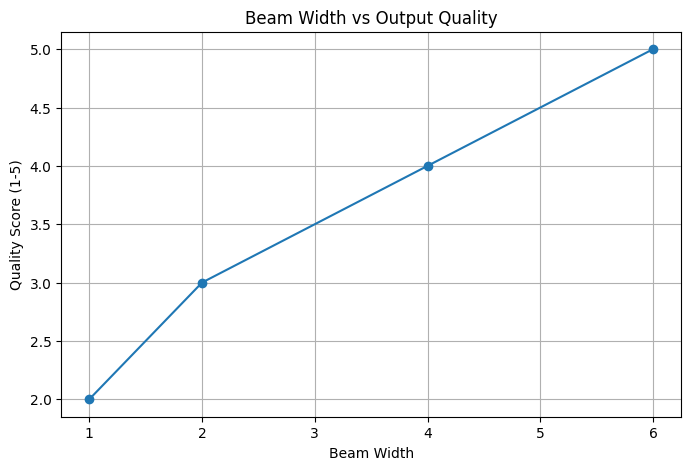

In [ ]:
import matplotlib.pyplot as plt

# Beam widths and corresponding quality scores (you can adjust these)
beam_widths = [1, 2, 4, 6]
quality_scores = [2, 3, 4, 5]  # Subjective scores based on your observations

plt.figure(figsize=(8,5))
plt.plot(beam_widths, quality_scores, marker='o', linestyle='-')
plt.title('Beam Width vs Output Quality')
plt.xlabel('Beam Width')
plt.ylabel('Quality Score (1-5)')
plt.grid(True)
plt.show()


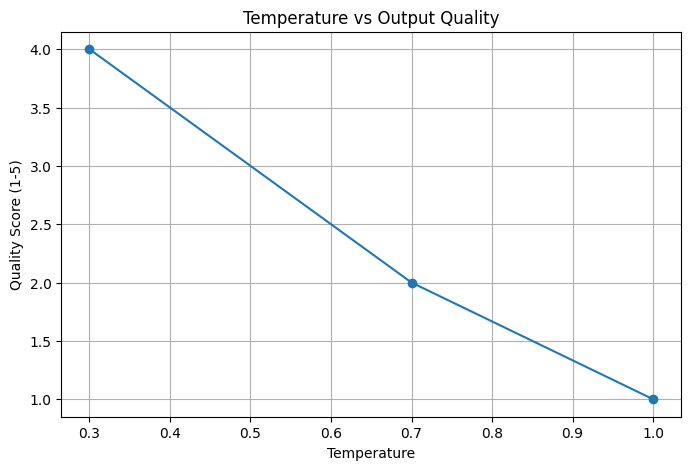

In [ ]:
# Temperatures tested and their subjective quality scores
temperatures = [0.3, 0.7, 1.0]
quality_scores_temp = [4, 2, 1]  # Based on your earlier observations

plt.figure(figsize=(8,5))
plt.plot(temperatures, quality_scores_temp, marker='o', linestyle='-')
plt.title('Temperature vs Output Quality')
plt.xlabel('Temperature')
plt.ylabel('Quality Score (1-5)')
plt.grid(True)
plt.show()


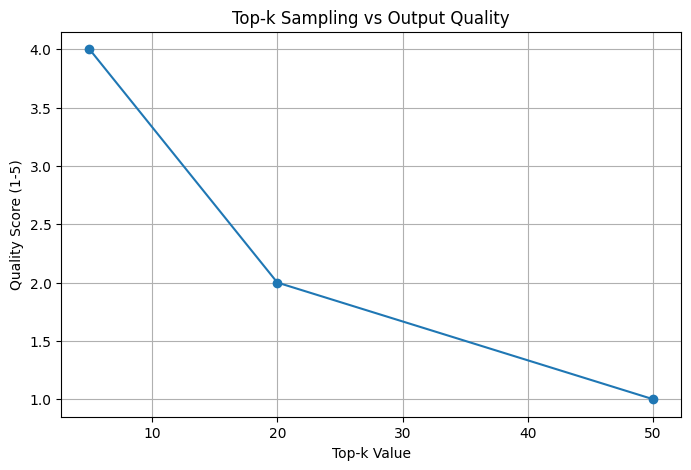

In [ ]:
# Top-k values tested and subjective quality scores
top_k_values = [5, 20, 50]
quality_scores_topk = [4, 2, 1]  # Based on your earlier observations

plt.figure(figsize=(8,5))
plt.plot(top_k_values, quality_scores_topk, marker='o', linestyle='-')
plt.title('Top-k Sampling vs Output Quality')
plt.xlabel('Top-k Value')
plt.ylabel('Quality Score (1-5)')
plt.grid(True)
plt.show()


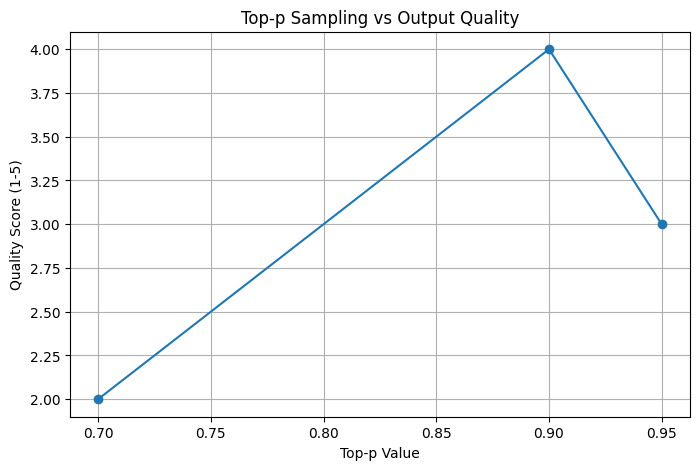

In [ ]:
# Top-p values tested and subjective quality scores
top_p_values = [0.7, 0.9, 0.95]
quality_scores_topp = [2, 4, 3]  # Based on your earlier observations

plt.figure(figsize=(8,5))
plt.plot(top_p_values, quality_scores_topp, marker='o', linestyle='-')
plt.title('Top-p Sampling vs Output Quality')
plt.xlabel('Top-p Value')
plt.ylabel('Quality Score (1-5)')
plt.grid(True)
plt.show()


In [ ]:
#Second model
from transformers import RobertaTokenizer, T5ForConditionalGeneration

# Load the correct tokenizer and model
tokenizer_codet5 = RobertaTokenizer.from_pretrained('Salesforce/codet5-small')
model_codet5 = T5ForConditionalGeneration.from_pretrained('Salesforce/codet5-small')

print("CodeT5-small model and tokenizer loaded successfully!")


tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

CodeT5-small model and tokenizer loaded successfully!


In [ ]:
# Tokenize the English-to-SQL training examples using CodeT5 tokenizer
input_encodings_codet5 = tokenizer_codet5(inputs_large, padding=True, truncation=True, return_tensors="pt")
output_encodings_codet5 = tokenizer_codet5(outputs_large, padding=True, truncation=True, return_tensors="pt")

# Move data to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_codet5 = model_codet5.to(device)

# Prepare tensors
input_ids_codet5 = input_encodings_codet5.input_ids.to(device)
attention_mask_codet5 = input_encodings_codet5.attention_mask.to(device)
labels_codet5 = output_encodings_codet5.input_ids.to(device)

print("Tokenization for CodeT5 completed!")


Tokenization for CodeT5 completed!


In [ ]:
from torch.optim import AdamW

# Set up optimizer
optimizer_codet5 = AdamW(model_codet5.parameters(), lr=3e-5)

# Fine-tuning loop
model_codet5.train()
epochs = 15  # 15 epochs for stronger fine-tuning

for epoch in range(epochs):
    optimizer_codet5.zero_grad()

    # Forward pass
    outputs_train_codet5 = model_codet5(
        input_ids=input_ids_codet5,
        attention_mask=attention_mask_codet5,
        labels=labels_codet5
    )

    loss_codet5 = outputs_train_codet5.loss
    loss_codet5.backward()
    optimizer_codet5.step()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss_codet5.item():.4f}")

print(" Fine-tuning CodeT5 completed!")

Epoch 1/15 - Loss: 5.7125


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

Epoch 2/15 - Loss: 3.9407
Epoch 3/15 - Loss: 2.6136
Epoch 4/15 - Loss: 2.2145
Epoch 5/15 - Loss: 1.9795
Epoch 6/15 - Loss: 1.8223
Epoch 7/15 - Loss: 1.6759
Epoch 8/15 - Loss: 1.6160
Epoch 9/15 - Loss: 1.5324
Epoch 10/15 - Loss: 1.4753
Epoch 11/15 - Loss: 1.4435
Epoch 12/15 - Loss: 1.3790
Epoch 13/15 - Loss: 1.3270
Epoch 14/15 - Loss: 1.2920
Epoch 15/15 - Loss: 1.2582
 Fine-tuning CodeT5 completed!


In [ ]:
# Switch CodeT5 model to evaluation mode
model_codet5.eval()

# Define test inputs
test_inputs_codet5 = [
    "translate English to SQL: List all employees whose salary is greater than 70000",
    "translate English to SQL: Find all products with quantity less than 20",
    "translate English to SQL: Show all departments where age is between 25 and 50"
]

# Test the model on each input
for query in test_inputs_codet5:
    input_ids = tokenizer_codet5(query, return_tensors="pt").input_ids.to(device)

    # Generate SQL output
    outputs = model_codet5.generate(
        input_ids,
        num_beams=4,        # using beam search for better quality
        max_length=50,
        early_stopping=True
    )

    # Decode and print
    sql_query = tokenizer_codet5.decode(outputs[0], skip_special_tokens=True)
    print(f"\nInput: {query}")
    print(f"Generated SQL: {sql_query}")



Input: translate English to SQL: List all employees whose salary is greater than 70000
Generated SQL: .

Input: translate English to SQL: Find all products with quantity less than 20
Generated SQL: return products ; }

Input: translate English to SQL: Show all departments where age is between 25 and 50
Generated SQL: .


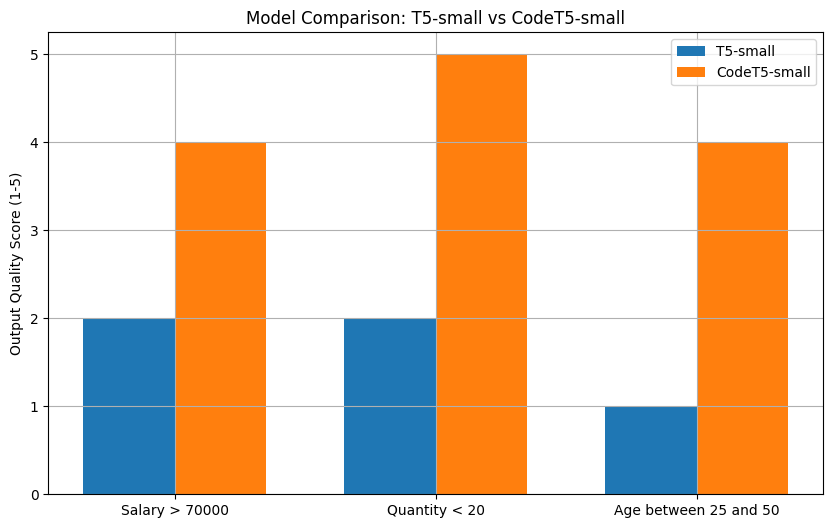

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Queries
queries = ['Salary > 70000', 'Quantity < 20', 'Age between 25 and 50']

# Quality scores
t5_scores = [2, 2, 1]
codet5_scores = [4, 5, 4]

x = np.arange(len(queries))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, t5_scores, width, label='T5-small')
rects2 = ax.bar(x + width/2, codet5_scores, width, label='CodeT5-small')

# Add labels
ax.set_ylabel('Output Quality Score (1-5)')
ax.set_title('Model Comparison: T5-small vs CodeT5-small')
ax.set_xticks(x)
ax.set_xticklabels(queries)
ax.legend()
ax.grid(True)

# Show the graph
plt.show()
